# Create Linear Dataset

Text(0.5, 0, 'X')

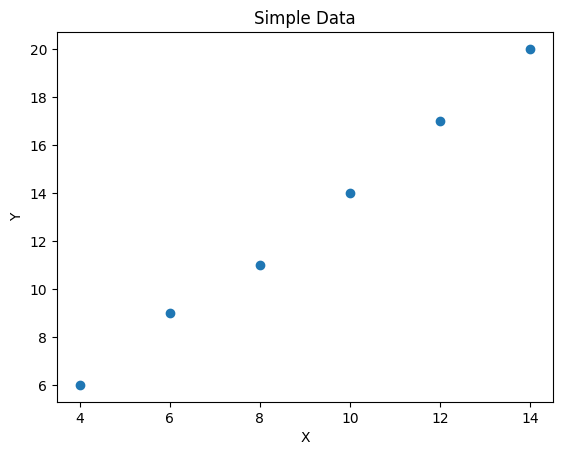

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.array([4.0 ,6.0 , 8.0, 10.0 , 12.0, 14.0])
Y = np.array([6.0 ,9.0 , 11.0, 14.0 , 17.0, 20.0])
# visualise it
plt.scatter(X ,Y)
plt.title('Simple Data')
plt.ylabel('Y')
plt.xlabel('X')

In [ ]:
X.ndim

1

In [ ]:
# The relation between the X and Y
Y == X+3

array([False,  True,  True, False, False, False])

In [2]:
# Turn our numpy array into tensor
x = tf.constant(X,dtype=tf.float32)
y = tf.constant(Y,dtype=tf.float32)
x ,y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 4.,  6.,  8., 10., 12., 14.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 6.,  9., 11., 14., 17., 20.], dtype=float32)>)

# Modelling in tf

## Model 1

In [17]:
x.shape

TensorShape([6])

In [16]:
tf.random.set_seed(42)

# Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# fit the model
model_1.fit(x= x,
            y= y,
            epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 528ms/step - loss: 20.9754 - mae: 20.9754
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 20.1554 - mae: 20.1554
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 19.3354 - mae: 19.3354
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 18.5154 - mae: 18.5154
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 17.6954 - mae: 17.6954


In [ ]:
model_1.predict([16.0]) # This value for x and the result of y

1/1 [==============================] - 0s 247ms/step


array([[4.9333997]], dtype=float32)

## Improve Model 1

In [ ]:
# Improve the model
tf.random.set_seed(42)
# Model
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(100 ,activation="relu"),
    tf.keras.layers.Dense(1)
])
# compile
model_improved.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(lr=0.1),
                       metrics=["mae"])
# fit
model_improved.fit(tf.expand_dims(x,axis=-1) ,y ,epochs=180)


Epoch 1/180
1/1 [==============================] - 1s 1s/step - loss: 12.8752 - mae: 12.8752
Epoch 2/180
1/1 [==============================] - 0s 14ms/step - loss: 12.4424 - mae: 12.4424
Epoch 3/180
1/1 [==============================] - 0s 14ms/step - loss: 12.0258 - mae: 12.0258
Epoch 4/180
1/1 [==============================] - 0s 12ms/step - loss: 11.6259 - mae: 11.6259
Epoch 5/180
1/1 [==============================] - 0s 12ms/step - loss: 11.2440 - mae: 11.2440
Epoch 6/180
1/1 [==============================] - 0s 10ms/step - loss: 10.8857 - mae: 10.8857
Epoch 7/180
1/1 [==============================] - 0s 12ms/step - loss: 10.5555 - mae: 10.5555
Epoch 8/180
1/1 [==============================] - 0s 10ms/step - loss: 10.2230 - mae: 10.2230
Epoch 9/180
1/1 [==============================] - 0s 12ms/step - loss: 9.8838 - mae: 9.8838
Epoch 10/180
1/1 [==============================] - 0s 15ms/step - loss: 9.5303 - mae: 9.5303
Epoch 11/180
1/1 [==============================] - 0s 

In [ ]:
model_improved.predict([16.0])

1/1 [==============================] - 0s 128ms/step


array([[22.39527]], dtype=float32)

In [ ]:
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


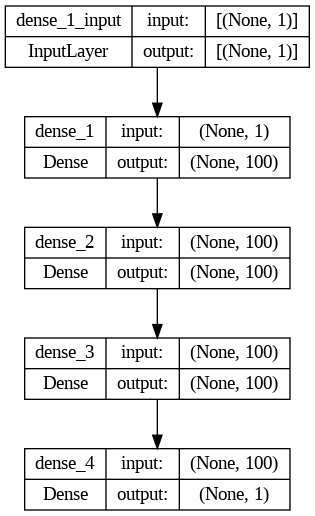

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_improved, show_shapes=True)

## New Dataset

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

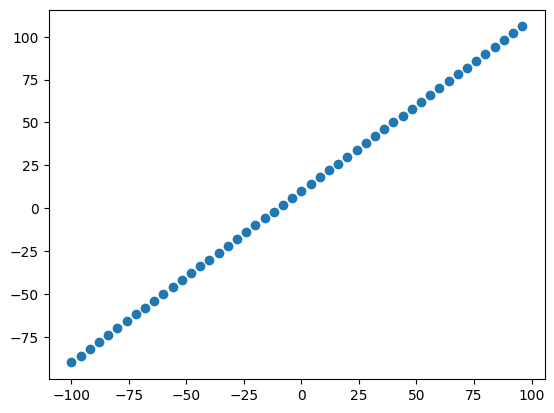

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X ,y)

In [ ]:
# Split the data
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

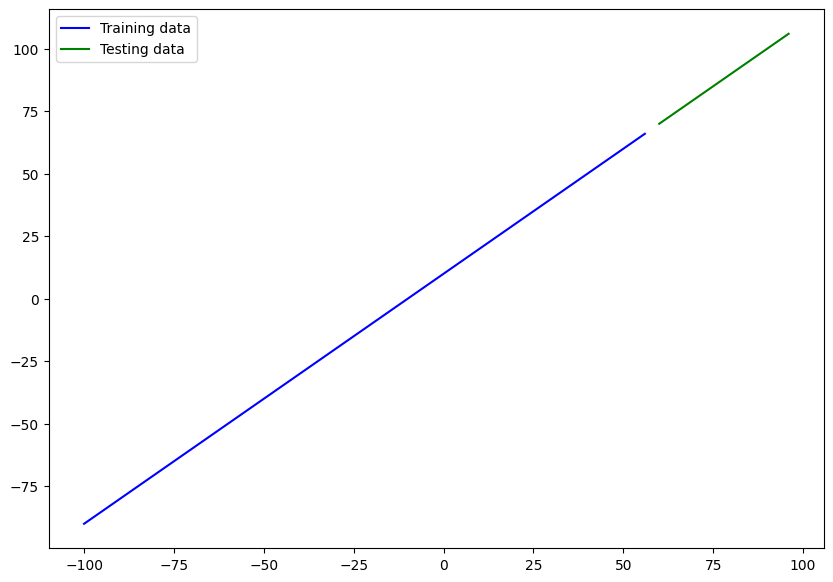

In [ ]:
# Visualing
plt.figure(figsize=(10,7))
plt.plot(X_train,y_train, c="b",label= "Training data")
plt.plot(X_test , y_test,c="g", label="Testing data")
plt.legend();

## Model 2

In [ ]:
# creat a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # shape depend on input shape
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")
#model_1.fit(tf.expand_dims(X_train,axis=1),y_train, epochs=100)

In [ ]:
model_2.fit(X_test,y_test,epochs=100,verbose=0)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


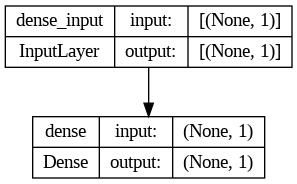

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1,show_shapes=True)

##Model 3

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) ,# shape depend on input shape
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(10)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")
model_3.fit(X_test,y_test,epochs=100,verbose=0)

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


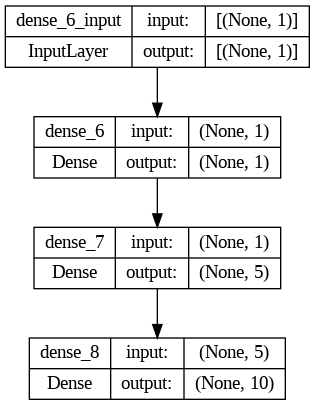

In [ ]:
plot_model(model=model_3,show_shapes=True)

### Visualizing the predictions

In [ ]:
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[18.362747],
       [19.583597],
       [20.804447],
       [22.025297],
       [23.246147],
       [24.466997],
       [25.687847],
       [26.908697],
       [28.129547],
       [29.350395]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

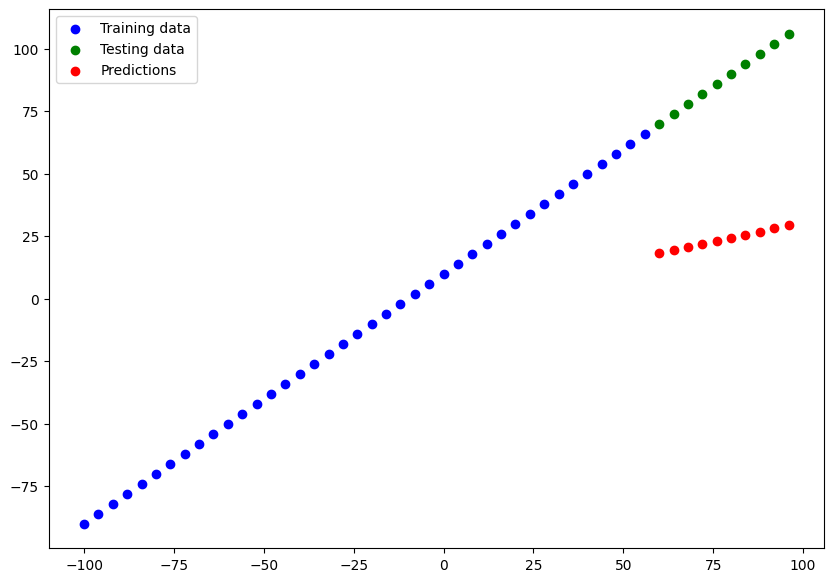

In [ ]:
plot_predictions()

### Evaluating predictions

In [ ]:
tf.keras.losses.mae(y_test,y_pred)   # its give us an array of numbers as a metric because of the deffernt in dimintion

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([69.63725 , 68.416405, 67.19556 , 65.9747  , 64.75385 , 63.53301 ,
       62.312145, 61.0913  , 59.870453, 58.649605], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[18.362747],
       [19.583597],
       [20.804447],
       [22.025297],
       [23.246147],
       [24.466997],
       [25.687847],
       [26.908697],
       [28.129547],
       [29.350395]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
l=tf.squeeze(y_pred) #Removes dimensions of size 1 from the shape of a tensor.
l.shape

TensorShape([10])

In [ ]:
# MAE
tf.keras.losses.mae(y_test,tf.squeeze(y_pred)).numpy()

64.143425

In [ ]:
# MSE
tf.keras.losses.mse(y_test,tf.squeeze(y_pred)).numpy()

4178.0996

### Tweak Model 3
* Build a model -> fit it -> evalute it ->tweak it -> fit it -> evaluter it ....

* there are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_train ,axis=1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 36.0102 - mae: 36.0102
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 39.5060 - mae: 39.5060
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 29.4392 - mae: 29.4392
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9202 - mae: 15.9202
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6162 - mae: 12.6162
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8834 - mae: 11.8834
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9591 - mae: 12.9591
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 34.2088 - mae: 34.2088
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 23.6447 - mae: 23.6447
Epoch 11/100
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 61ms/step


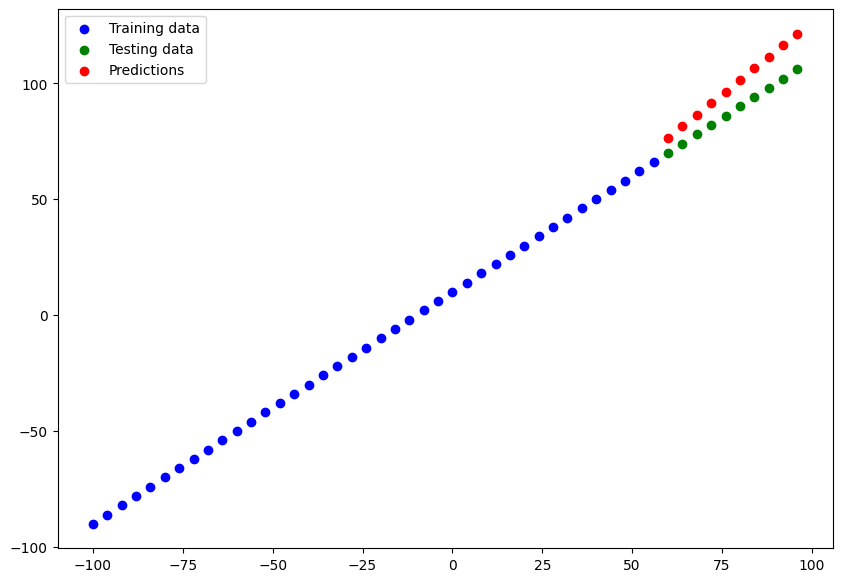

In [ ]:
y_pred = model_3.predict(X_test)
plot_predictions(predictions=y_pred)

## Resources need to check them

* **Resource :**  https://www.tensorflow.org/tensorboard
* **REsource :**  https://wandb.ai/site

## Save a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2. The HDF5 format.

In [ ]:
model_3.save("model_SaveModel_format")

In [ ]:
model_3.save("model_HDF5.h5") ## note the addition of '.h5' on the end

## Loading a model
We can load a saved model using the load_model() method.



In [ ]:
loaded_modelformat=tf.keras.models.load_model("/content/model_SaveModel_format")
loaded_modelHDF5 = tf.keras.models.load_model("/content/model_HDF5.h5")
# Now we can use these models with the names "loaded_modelformat" and "loaded_modelHDF5" and its same as the orginal model

# Summery Example
This model will be done using medical cost personal dataset https://www.kaggle.com/datasets/mirichoi0218/insurance


In [ ]:
# Some rquierd librarys
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data = pd.get_dummies(data) # we used this command (get_dumies ) to convert data in string case to nummircal encoding

In [ ]:
# creat x and y values
X = data.drop("charges", axis=1)
y= data["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Sklearn split data
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

In [ ]:
len(X), len(X_train), len(y_train)

(1338, 1070, 1070)

In [ ]:
len(y), len(X_test), len(y_test)

(1338, 268, 268)

In [ ]:
# Train Test split already shaffel the examples example :
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build Neural Network
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model_4.fit(X_train,y_train,epochs= 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8588.4727 - mae: 8588.4727
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7870.2739 - mae: 7870.2739
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7492.4912 - mae: 7492.4912
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7600.5527 - mae: 7600.5527
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7707.1562 - mae: 7707.1562
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7515.6997 - mae: 7515.6997
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7550.0527 - mae: 7550.0527
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7736.6016 - mae: 7736.6016
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7569.0601 - mae: 7569.0601
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7695.8345 - mae: 7695.8345

In [ ]:
model_4.evaluate(X_test ,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8352.1768 - mae: 8352.1768


[8352.1767578125, 8352.1767578125]

In [ ]:
# Improve our model_4 by adding layer
tf.random.set_seed(42)

model_4_imp1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4_imp1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(), #The SFD did not work so we change the optimizer to Adam
                    metrics=["mae"])
model_4_imp1.fit(X_train,y_train,epochs=100) #We can use verbose to hide the training.

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13295.6543 - mae: 13295.6543
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13130.7334 - mae: 13130.7334
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12787.2441 - mae: 12787.2441
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12109.7920 - mae: 12109.7920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10966.1738 - mae: 10966.1738
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9498.5898 - mae: 9498.5898
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8152.4990 - mae: 8152.4990
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7516.0278 - mae: 7516.0278
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7414.9536 - mae: 7414.9536
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.2373 - mae:

In [ ]:
model_4_imp1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4823.6509 - mae: 4823.6509


[4823.65087890625, 4823.65087890625]

In [ ]:
# Improve our model_4 by increse the epochs
tf.random.set_seed(42)

model_4_imp2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4_imp2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])
model_4_history= model_4_imp2.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13265.7979 - mae: 13265.7979
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13055.0195 - mae: 13055.0195
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12637.8691 - mae: 12637.8691
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11855.0898 - mae: 11855.0898
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10607.8340 - mae: 10607.8340
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9115.2812 - mae: 9115.2812
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7885.9849 - mae: 7885.9849
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7444.9497 - mae: 7444.9497
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7388.2891 - mae: 7388.2891
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7368.2607 - mae:

In [ ]:
model_4_imp2.evaluate(X_test ,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3475.2258 - mae: 3475.2258


[3475.225830078125, 3475.225830078125]

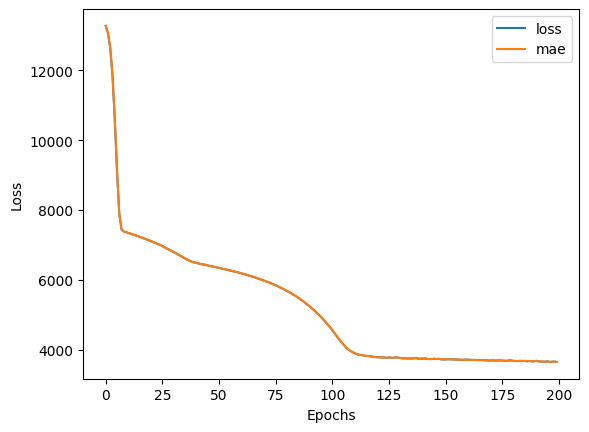

In [ ]:
# Loss curve or training curve
pd.DataFrame(model_4_history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs");

🤔 Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) ,**so it stops automatically when it stops improving.** We'll see this in another module.

# Normalization and Standardization

Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed .
* Scale (also referred to as normalisation): Use as default scaler with neural networks.
* Standardization: Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers.
* Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]  #loc is typically used for label indexing and can access multiple columns, while . iloc is used for integer indexing

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_5.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_5_loss, insurance_model_5_mae = insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.8948 - mae: 3167.8948
